This is an anonymized, binary classification dataset found on a USB stick that washed ashore in a bottle. There was no data dictionary with the dataset, but this poem was handwritten on an accompanying scrap of paper:

```
Silly column names abound,
but the test set is a mystery.
Careful how you pick and slice,
or be left behind by history.
```

* train.csv - the training set
* test.csv - the test set (you must predict the target value for these variables)
* sample_submission.csv - a sample submission file in the correct format

In [1]:
# 数据集路径
INPUT_PATH = '../input/'

import numpy as np
import pandas as pd

# 画图
import matplotlib.pyplot as plt
import seaborn as sns

# 警告不输出
import warnings
warnings.filterwarnings("ignore")

import time
import gc

# 进度条
from tqdm import tqdm

# 数据划分，评价指标
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import roc_auc_score

In [3]:
! ls ../input 

sample_submission.csv	   test.csv	 train.csv
sample_submission.csv.zip  test.csv.zip  train.csv.zip


In [4]:
train = pd.read_csv(INPUT_PATH + 'train.csv')
test = pd.read_csv(INPUT_PATH + 'test.csv') # 公开的测试集

In [5]:
train.shape, test.shape

((262144, 258), (131073, 257))

In [6]:
train.head()

,id,muggy-smalt-axolotl-pembus,dorky-peach-sheepdog-ordinal,slimy-seashell-cassowary-goose,snazzy-harlequin-chicken-distraction,frumpy-smalt-mau-ordinal,stealthy-beige-pinscher-golden,chummy-cream-tarantula-entropy,hazy-emerald-cuttlefish-unsorted,nerdy-indigo-wolfhound-sorted,...,wheezy-myrtle-mandrill-entropy,wiggy-lilac-lemming-sorted,gloppy-cerise-snail-contributor,woozy-silver-havanese-gaussian,jumpy-thistle-discus-sorted,muggy-turquoise-donkey-important,blurry-buff-hyena-entropy,bluesy-chocolate-kudu-fepid,gamy-white-monster-expert,target
0,707b395ecdcbb4dc2eabea00e4d1b179,-2.070654,1.018160,0.228643,0.857221,0.052271,0.230303,-6.385090,0.439369,-0.721946,...,0.351895,0.618824,-1.542423,0.598175,0.611757,0.678772,0.247059,-0.806677,-0.193649,0
1,5880c03c6582a7b42248668e56b4bdec,-0.491702,0.082645,-0.011193,1.071266,-0.346347,-0.082209,0.110579,-0.382374,-0.229620,...,-0.645115,-1.246090,2.613357,-0.479664,1.581289,0.931258,0.151937,-0.766595,0.474351,0
2,4ccbcb3d13e5072ff1d9c61afe2c4f77,-1.680473,0.860529,-1.076195,0.740124,3.678445,0.288558,0.515875,0.920590,-1.223277,...,0.516422,0.130521,-0.459210,2.028205,-0.093968,-0.218274,-0.163136,-0.870289,0.064038,1
3,e350f17a357f12a1941f0837afb7eb8d,0.183774,0.919134,-0.946958,0.918492,0.862278,1.155287,0.911106,0.562598,-1.349685,...,-1.168967,1.385089,-0.353028,3.316150,-0.524087,-0.794327,3.936365,0.682989,-2.521211,0
4,a8f910ea6075b6376af079055965ff68,-0.203933,-0.177252,0.368074,-0.701320,-1.104391,0.735760,0.894273,-1.375826,-5.144946,...,-0.279168,1.544356,2.959727,1.641201,-0.130818,-0.264292,-0.748668,0.964218,0.087079,0


In [7]:
test.head()

,id,muggy-smalt-axolotl-pembus,dorky-peach-sheepdog-ordinal,slimy-seashell-cassowary-goose,snazzy-harlequin-chicken-distraction,frumpy-smalt-mau-ordinal,stealthy-beige-pinscher-golden,chummy-cream-tarantula-entropy,hazy-emerald-cuttlefish-unsorted,nerdy-indigo-wolfhound-sorted,...,goopy-lavender-wolverine-fimbus,wheezy-myrtle-mandrill-entropy,wiggy-lilac-lemming-sorted,gloppy-cerise-snail-contributor,woozy-silver-havanese-gaussian,jumpy-thistle-discus-sorted,muggy-turquoise-donkey-important,blurry-buff-hyena-entropy,bluesy-chocolate-kudu-fepid,gamy-white-monster-expert
0,1c13f2701648e0b0d46d8a2a5a131a53,-5.490030,0.593976,1.532732,-0.361234,-0.155282,-1.340582,1.626819,4.280084,-0.340155,...,0.386831,0.817764,-1.215121,0.238812,-0.507346,1.360599,-1.743894,1.412043,-0.562730,-0.237948
1,ba88c155ba898fc8b5099893036ef205,0.571698,0.495494,1.133975,-0.315875,-2.142458,-0.478650,-1.458941,0.977352,0.159189,...,-1.120400,-0.953432,0.266619,-2.088512,0.252637,-1.034676,-0.804765,0.639112,1.172667,-1.666513
2,7cbab5cea99169139e7e6d8ff74ebb77,0.478202,-1.429985,0.410429,-1.329215,-0.888456,0.721798,-0.809630,-0.216637,4.038961,...,1.330744,-0.757244,1.289617,1.824534,-0.306249,-0.875231,-0.436228,0.007315,-0.841215,1.099160
3,ca820ad57809f62eb7b4d13f5d4371a0,0.124178,-0.347069,-0.457690,1.248395,0.368441,0.832838,-2.050084,3.168626,-0.399716,...,-0.839954,-2.029489,3.218734,1.091271,1.384581,-0.313402,-0.816372,1.079761,-0.168144,0.102878
4,7baaf361537fbd8a1aaa2c97a6d4ccc7,-1.806586,0.660947,-0.004663,-3.383956,1.018235,1.670834,-0.208904,0.124925,0.224575,...,0.024204,0.680223,0.801870,-0.681506,1.340432,-0.645714,0.002157,0.733017,2.039239,0.842452


In [8]:
train.describe()

,muggy-smalt-axolotl-pembus,dorky-peach-sheepdog-ordinal,slimy-seashell-cassowary-goose,snazzy-harlequin-chicken-distraction,frumpy-smalt-mau-ordinal,stealthy-beige-pinscher-golden,chummy-cream-tarantula-entropy,hazy-emerald-cuttlefish-unsorted,nerdy-indigo-wolfhound-sorted,leaky-amaranth-lizard-sorted,...,wheezy-myrtle-mandrill-entropy,wiggy-lilac-lemming-sorted,gloppy-cerise-snail-contributor,woozy-silver-havanese-gaussian,jumpy-thistle-discus-sorted,muggy-turquoise-donkey-important,blurry-buff-hyena-entropy,bluesy-chocolate-kudu-fepid,gamy-white-monster-expert,target
count,262144.000000,262144.000000,262144.000000,262144.000000,262144.000000,262144.000000,262144.000000,262144.000000,262144.000000,262144.000000,...,262144.000000,262144.000000,262144.000000,262144.000000,262144.000000,262144.000000,262144.000000,262144.000000,262144.000000,262144.000000
mean,0.005924,0.000936,-0.012530,-0.005688,0.001607,0.007878,-0.003500,-0.005927,0.002664,0.020485,...,-0.002670,-0.011401,0.007895,0.000651,-0.002613,0.002351,-0.011684,-0.007153,-0.004066,0.500225
std,1.706660,1.720943,1.698693,1.874875,1.726869,1.734646,1.720431,1.693276,1.872248,1.645070,...,1.799308,1.788832,1.775853,1.703296,1.692972,1.742284,1.698231,1.759408,1.661463,0.500001
min,-15.588429,-15.644144,-15.235982,-15.672966,-16.800626,-14.789422,-15.591329,-15.696478,-17.011807,-14.693510,...,-16.740804,-17.681945,-15.705197,-15.765274,-15.604682,-16.965775,-15.064518,-16.145154,-16.815640,0.000000
25%,-0.765404,-0.770224,-0.777421,-0.802502,-0.770838,-0.771608,-0.770634,-0.764398,-0.795475,-0.756594,...,-0.782944,-0.788437,-0.778580,-0.767367,-0.764199,-0.770457,-0.768885,-0.785702,-0.766552,0.000000
50%,0.002148,0.003543,-0.005771,-0.003505,0.000866,0.002830,0.001257,-0.003657,0.004936,0.004372,...,-0.002239,-0.004543,-0.000675,0.000771,-0.000331,-0.000617,-0.005634,-0.004459,-0.004471,1.000000
75%,0.769228,0.773400,0.764092,0.798460,0.769954,0.776606,0.769794,0.752836,0.800376,0.764807,...,0.786180,0.776178,0.788910,0.769277,0.764115,0.773100,0.753518,0.774197,0.758012,1.000000
max,15.797000,18.577178,17.205310,16.585173,16.815798,17.378922,15.202100,16.645394,19.396192,17.131375,...,15.511936,16.252503,16.387990,16.260286,14.748128,16.212146,18.866005,18.811832,17.302211,1.000000


In [27]:
for col in train.columns[1:-1]:
    print(col, train[col].nunique())

muggy-smalt-axolotl-pembus 254322
dorky-peach-sheepdog-ordinal 254588
slimy-seashell-cassowary-goose 254356
snazzy-harlequin-chicken-distraction 254576
frumpy-smalt-mau-ordinal 254330
stealthy-beige-pinscher-golden 254270
chummy-cream-tarantula-entropy 254324
hazy-emerald-cuttlefish-unsorted 254224
nerdy-indigo-wolfhound-sorted 254752
leaky-amaranth-lizard-sorted 254205
ugly-tangerine-chihuahua-important 254170
shaggy-silver-indri-fimbus 253956
flaky-chocolate-beetle-grandmaster 254352
squirrely-harlequin-sheep-sumble 254224
freaky-tan-angelfish-noise 254240
lousy-plum-penguin-sumble 254554
bluesy-rose-wallaby-discard 254273
baggy-copper-oriole-dummy 253989
stealthy-scarlet-hound-fepid 254548
greasy-cinnamon-bonobo-contributor 254417
cranky-cardinal-dogfish-ordinal 254235
snippy-auburn-vole-learn 254154
greasy-sepia-coral-dataset 254472
flabby-tangerine-fowl-entropy 254459
lousy-smalt-pinscher-dummy 254462
bluesy-brass-chihuahua-distraction 254302
goopy-eggplant-indri-entropy 254591
ho

In [31]:
train['wheezy-copper-turtle-magic'].value_counts()

51     570
489    556
298    554
135    554
245    553
      ... 
277    476
215    475
108    472
42     471
185    442
Name: wheezy-copper-turtle-magic, Length: 512, dtype: int64

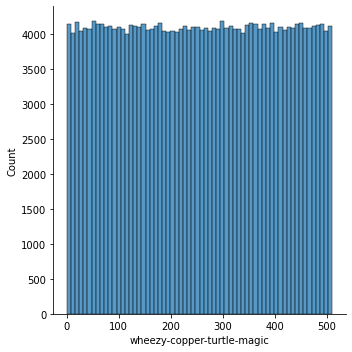

In [28]:
col = 'wheezy-copper-turtle-magic'
sns.displot(train[col])

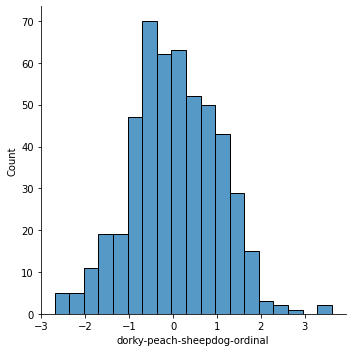

In [34]:
col = 'dorky-peach-sheepdog-ordinal'

sns.displot(train[train['wheezy-copper-turtle-magic'] == 10][col])

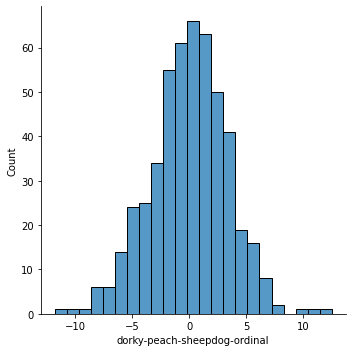

In [35]:
col = 'dorky-peach-sheepdog-ordinal'

sns.displot(train[train['wheezy-copper-turtle-magic'] == 12][col])

In [12]:
# 1. 数据集很有可能是人造的数据集。
# 2. 字段很多200+，字段展示的为数值类型。
# 3. wheezy-copper-turtle-magic是不是对样本进行分组的变量

In [13]:
feature_names = train.columns[1:-1]
target = train['target']

In [24]:
skf = StratifiedKFold(n_splits=10, shuffle=True)
train_oof = np.zeros(train.shape[0])
test_oof = np.zeros(test.shape[0])

from sklearn.linear_model import LogisticRegression
for trn_idx, val_idx in skf.split(train.values, target.values):
    # print(target.iloc[val_idx].value_counts())
    
    x_train, y_train = train.iloc[trn_idx][feature_names], target.iloc[trn_idx]
    x_val, y_val = train.iloc[val_idx][feature_names], target.iloc[val_idx]
    
    # 模型定义+训练
    clf = LogisticRegression()
    clf.fit(x_train, y_train)
    
    # 验证集预测
    val_pred = clf.predict_proba(x_val)[:, 1]
    train_oof[val_idx] = val_pred

    # 测试集预测
    test_oof += clf.predict_proba(test[feature_names])[:, 1]
    
    print(roc_auc_score(y_val, val_pred))

test_oof /= 10

0.5266584227423352
0.5293446012638658
0.5324509675493934
0.5379223572396097
0.5321686227864859
0.5378223436308353
0.5278866134407609
0.5260786046552322
0.5211437937960987
0.5279013404314867


In [45]:
skf = StratifiedKFold(n_splits=10, shuffle=True)
train_oof = np.zeros(train.shape[0])
test_oof = np.zeros(test.shape[0])

from sklearn.linear_model import LogisticRegression
for trn_idx, val_idx in skf.split(train.values, target.values):
    
    # 数据集交叉验证划分
    x_train = train.iloc[trn_idx]
    x_val, y_val = train.iloc[val_idx][feature_names], target.iloc[val_idx]
    
    for i in tqdm(range(512)):
        x_train2 = x_train[x_train['wheezy-copper-turtle-magic'] == i]
        x_val2 = x_val[x_val['wheezy-copper-turtle-magic'] == i]
        test2 = test[test['wheezy-copper-turtle-magic'] == i]
        
        clf = LogisticRegression()
        clf.fit(x_train2[feature_names], x_train2.target)
        
        train_oof[x_val2.index] = clf.predict_proba(x_val2)[:, 1]
        test_oof[test2.index] += clf.predict_proba(test2[feature_names])[:, 1]
    
    # break

100%|██████████| 512/512 [00:33<00:00, 15.39it/s]


In [48]:
roc_auc_score(target[val_idx], train_oof[val_idx])

0.7194074717511022

In [38]:
train[col].unique()

array([ 99,  52, 230,  78, 497, 131,  50, 141, 300,  85,  70,  61,  69,
        81,  58, 358, 212, 169, 145,  38, 500, 242, 322, 492, 437, 400,
       229,  16, 351, 247, 438, 303, 155, 356,  27,  45,  12, 193, 390,
        49, 173, 311, 280, 421,   2, 478, 442,  14,  83, 125, 268, 333,
       406, 506, 502, 319, 318, 450, 353,   5, 299,  37, 249, 240, 339,
       206, 110, 373, 415, 328,  36,  79, 374,  90, 472,  51, 115, 261,
        39, 297, 238, 164, 359,   9, 449,  24, 332,  26, 396, 211, 434,
       479, 453, 397, 451, 304, 393, 281, 461, 188, 203, 325, 476, 108,
       142, 460, 236,  60,   3, 157, 182, 174, 228, 246, 321, 254, 270,
       120, 423, 503, 378,  57,  30, 289, 344, 274,  29, 219, 380,  91,
        25, 422, 148, 468, 487, 191,  56, 100,  71, 336, 425, 175, 279,
       371, 377, 109, 509,  48, 326, 208,   7, 260, 407, 505, 382, 489,
       346, 159, 350, 296, 501, 189, 432, 431, 216, 252, 418,  96,  42,
       413, 347, 457, 355, 498,  55, 221,  89, 225, 170,  23, 12